In [14]:
import os
import cv2
import matplotlib.pyplot as plt


In [9]:
# Define the path to the dataset
dataset_path = '/kaggle/input/images-dataset'


In [10]:
image_file=os.listdir('/kaggle/input/images-dataset')

In [28]:
import os
from PIL import Image

# Set dataset path
dataset_path = '/kaggle/input/images-dataset/data'

# Categories
categories = ['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

X, y = [], []  # Image data and labels

for category in categories:
    category_path = os.path.join(dataset_path, category)
    
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        
        img = Image.open(image_path)  # Open the image
        X.append(img)  # Store the image as a PIL object
        y.append(category)  # Store label

print(f"Loaded {len(X)} images.")


Loaded 1803 images.


In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


In [37]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% for validation
)

# Load train data
train_ds = train_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify subset as training data
)

# Load validation data
validation_ds = train_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify subset as validation data
)

Found 2887 images belonging to 8 classes.
Found 719 images belonging to 8 classes.


In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [39]:

# Step 1: Build the CNN Model
model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Third Convolutional Layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the results to feed into a fully connected layer
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation='relu'),
    
    # Dropout to prevent overfitting
    Dropout(0.5),
    
    # Output layer (number of classes = 8 in this case)
    Dense(8, activation='softmax')  # 8 classes so 8 outputs
])



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# Step 2: Compile the Model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',  # Suitable for multi-class classification
              metrics=['accuracy'])



In [41]:
# Model summary to see the layers
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,992 (42.61 MB)

 Trainable params: 11,169,992 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Step 3: Train the Model
history = model.fit(
    train_ds,  # Training data
    epochs=10,  # Number of epochs
    validation_data=validation_ds  # Validation data
)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1726825385.631831     443 service.cc:145] XLA service 0x79b348004ac0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726825385.631898     443 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 1/91 ━━━━━━━━━━━━━━━━━━━━ 13:47 9s/step - accuracy: 0.0625 - loss: 2.1131

I0000 00:00:1726825391.144542     443 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


91/91 ━━━━━━━━━━━━━━━━━━━━ 40s 337ms/step - accuracy: 0.4447 - loss: 1.9034 - val_accuracy: 0.1947 - val_loss: 1.8430
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.5406 - loss: 1.3616 - val_accuracy: 0.2017 - val_loss: 1.9639
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.5568 - loss: 1.1999 - val_accuracy: 0.1363 - val_loss: 2.6024
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.5688 - loss: 1.1014 - val_accuracy: 0.1599 - val_loss: 2.6379
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.5549 - loss: 1.0896 - val_accuracy: 0.2003 - val_loss: 2.2981
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.5581 - loss: 1.0020 - val_accuracy: 0.1307 - val_loss: 3.0968
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.5538 - loss: 0.9596 - val_accuracy: 0.1516 - val_loss: 2.7337
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.5515 - loss: 0.9143 - val_accuracy: 0.1502 - val_loss: 

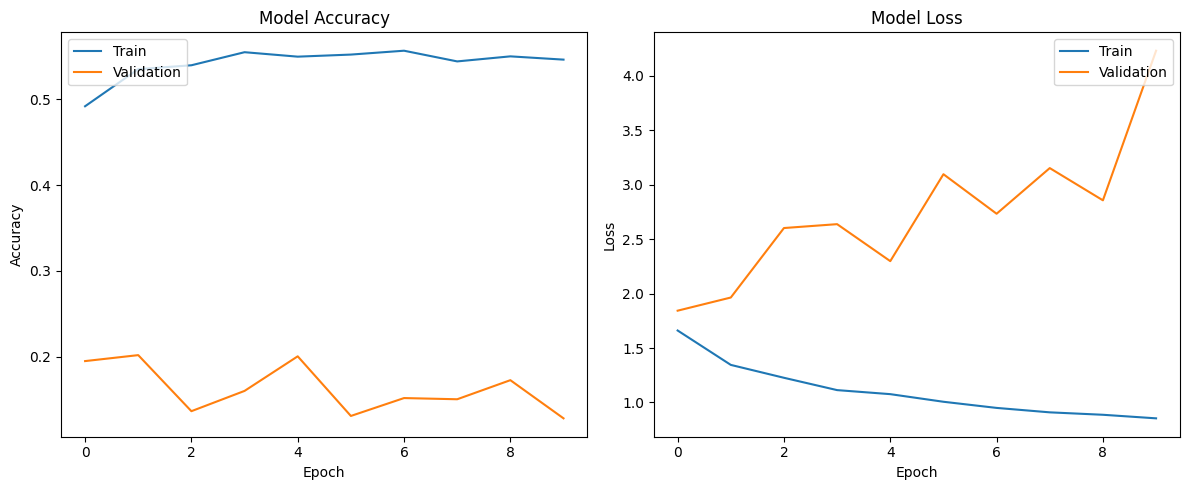

In [43]:
import matplotlib.pyplot as plt

# Assuming you have the history object from model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


In [44]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


# **EfficientNet**

In [45]:

# Load EfficientNetB5 model, pre-trained on ImageNet
base_model = EfficientNetB5(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# Freeze the base model layers
base_model.trainable = False


115263384/115263384 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [46]:
# Build the model
model = Sequential([
    base_model,  # Add the base model
    GlobalAveragePooling2D(),  # Add global average pooling layer
    Dense(1024, activation='relu'),  # Add a dense layer
    Dense(512, activation='relu'),   # Add another dense layer
    Dense(8, activation='softmax')   # Output layer (8 classes for your dataset)
])

In [48]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [49]:
# Summary of the model
model.summary()



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,296 │ stem_conv_pad[0]… │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        192 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        432 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        192 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 48)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 48)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 12)  │        588 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 48)  │        624 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 48)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      1,152 │ block1a_se_excit

 Total params: 31,140,607 (118.79 MB)

 Trainable params: 2,627,080 (10.02 MB)

 Non-trainable params: 28,513,527 (108.77 MB)

In [50]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=10  # Adjust epochs as needed
)


Epoch 1/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 178s 977ms/step - accuracy: 0.4928 - loss: 1.7395 - val_accuracy: 0.5007 - val_loss: 1.6609
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.5037 - loss: 1.6608 - val_accuracy: 0.5007 - val_loss: 1.6439
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.4937 - loss: 1.6789 - val_accuracy: 0.5007 - val_loss: 1.6410
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.5087 - loss: 1.6345 - val_accuracy: 0.5007 - val_loss: 1.6503
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.5050 - loss: 1.6433 - val_accuracy: 0.5007 - val_loss: 1.6716
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.4977 - loss: 1.6686 - val_accuracy: 0.5007 - val_loss: 1.6428
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - accuracy: 0.5086 - loss: 1.6348 - val_accuracy: 0.5007 - val_loss: 1.6557
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - accuracy: 0.5029 - loss: 1.6478 - val_acc

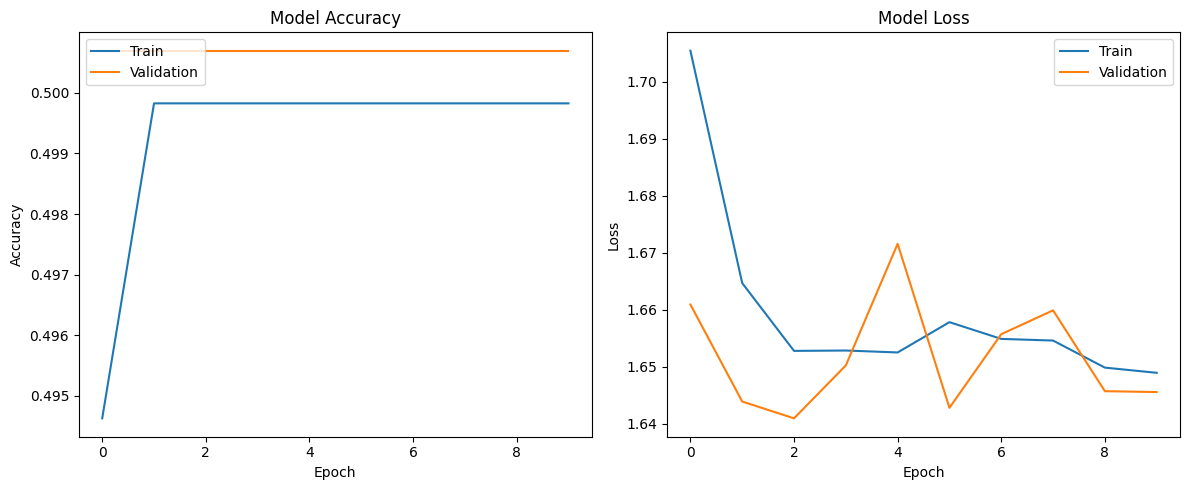

In [51]:
import matplotlib.pyplot as plt

# Assuming you have the history object from model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


# **DenseNet121**

In [52]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential

# Define the model
model = Sequential()

# Add the DenseNet121 base model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.add(base_model)

# Add global average pooling
model.add(GlobalAveragePooling2D())

# Add a fully connected layer
model.add(Dense(1024, activation='relu'))

# Add the output layer (8 classes, using softmax activation)
model.add(Dense(8, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

# Fit the model on the dataset
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=10  # You can increase the number of epochs as needed
)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ ?                      │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 6,953,856 (26.53 MB)

 Non-trainable params: 83,648 (326.75 KB)

Epoch 1/10
47/91 ━━━━━━━━━━━━━━━━━━━━ 8s 183ms/step - accuracy: 0.4817 - loss: 1.6291

I0000 00:00:1726826490.966729     443 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_19', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_20', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_21', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_22', 12 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_23', 16 bytes spill stores, 16 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_compare_reduce_slice_fusion', 2092 bytes spill stores, 2060 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_compare_reduce_fusion_24', 8 bytes spill st

91/91 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.5013 - loss: 1.4749 - val_accuracy: 0.3755 - val_loss: 5.8195
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 74s 202ms/step - accuracy: 0.5516 - loss: 0.9678 - val_accuracy: 0.1419 - val_loss: 37.8019
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.5533 - loss: 0.8491 - val_accuracy: 0.2545 - val_loss: 3.2370
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 201ms/step - accuracy: 0.5602 - loss: 0.8293 - val_accuracy: 0.2448 - val_loss: 1.6428
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 201ms/step - accuracy: 0.5542 - loss: 0.7674 - val_accuracy: 0.1739 - val_loss: 3.9617
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 200ms/step - accuracy: 0.5490 - loss: 0.7618 - val_accuracy: 0.1544 - val_loss: 11.6613
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 200ms/step - accuracy: 0.5594 - loss: 0.7519 - val_accuracy: 0.2337 - val_loss: 7.0604
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 201ms/step - accuracy: 0.5741 - loss: 0.6999 - val_accuracy: 0.121

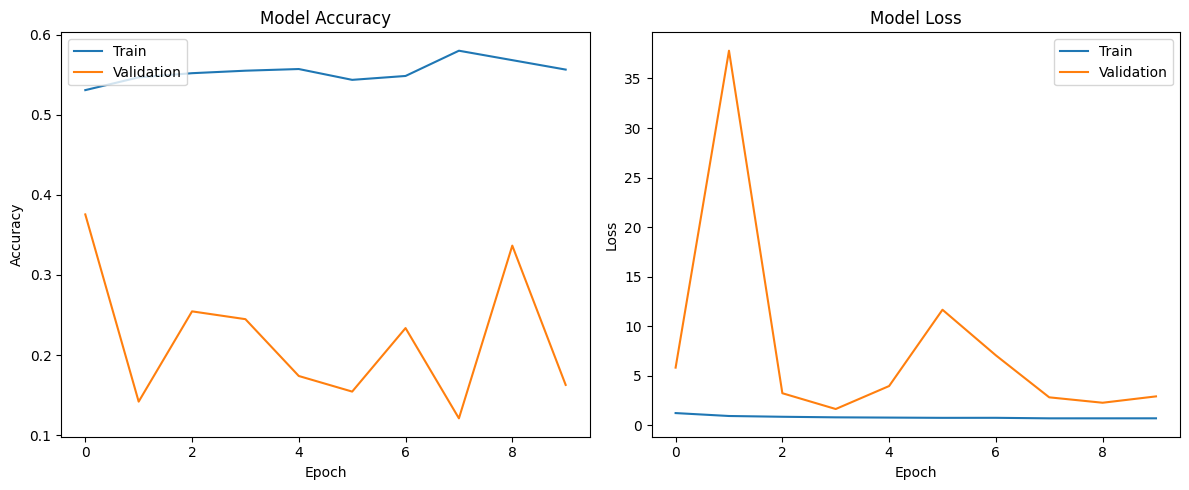

In [53]:
import matplotlib.pyplot as plt

# Assuming you have the history object from model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


# **Optimized Densenet121**

In [55]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential

# Build the model
model = Sequential()
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, clipvalue=1.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=30,
    callbacks=[early_stopping, reduce_lr]
)

# Summary
model.summary()

Epoch 1/30
89/91 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.2945 - loss: 3.1990

I0000 00:00:1726827108.124342     443 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_19', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_20', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_21', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_22', 12 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_23', 16 bytes spill stores, 16 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_compare_reduce_slice_fusion', 2092 bytes spill stores, 2060 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_compare_reduce_fusion_24', 8 bytes spill st

91/91 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.2971 - loss: 3.1830 - val_accuracy: 0.3338 - val_loss: 23.6404 - learning_rate: 1.0000e-04
Epoch 2/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 204ms/step - accuracy: 0.4808 - loss: 1.9421 - val_accuracy: 0.1711 - val_loss: 31.7540 - learning_rate: 1.0000e-04
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 203ms/step - accuracy: 0.5493 - loss: 1.5889 - val_accuracy: 0.1252 - val_loss: 14.6377 - learning_rate: 1.0000e-04
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - accuracy: 0.5220 - loss: 1.5136 - val_accuracy: 0.1558 - val_loss: 30.9303 - learning_rate: 1.0000e-04
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 205ms/step - accuracy: 0.5594 - loss: 1.4126 - val_accuracy: 0.1307 - val_loss: 9.2963 - learning_rate: 1.0000e-04
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 201ms/step - accuracy: 0.5542 - loss: 1.4096 - val_accuracy: 0.1238 - val_loss: 24.7427 - learning_rate: 1.0000e-04
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - accuracy: 0

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,536,026 (85.97 MB)

 Trainable params: 7,483,784 (28.55 MB)

 Non-trainable params: 84,672 (330.75 KB)

 Optimizer params: 14,967,570 (57.10 MB)

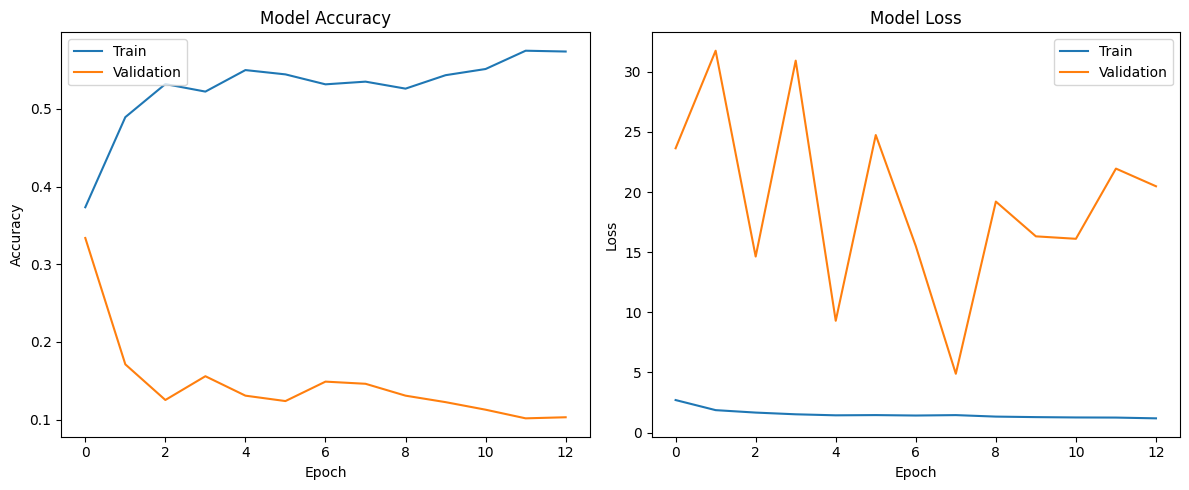

In [56]:
import matplotlib.pyplot as plt

# Assuming you have the history object from model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


***Optimized EfficientNet***

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential

# Build the model
model = Sequential()
base_model = EfficientNetB5(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, clipvalue=1.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=30,
    callbacks=[early_stopping, reduce_lr]
)

# Summary
model.summary()


Epoch 1/30
17/91 ━━━━━━━━━━━━━━━━━━━━ 28s 388ms/step - accuracy: 0.1625 - loss: 3.9739

I0000 00:00:1726827803.621091     445 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_696', 36 bytes spill stores, 36 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_3', 356 bytes spill stores, 356 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion', 492 bytes spill stores, 492 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_6', 36 bytes spill stores, 36 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_692', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_9', 36 bytes spill stores, 36 bytes spill loads



91/91 ━━━━━━━━━━━━━━━━━━━━ 471s 2s/step - accuracy: 0.2451 - loss: 3.6066 - val_accuracy: 0.0556 - val_loss: 2.8844 - learning_rate: 1.0000e-04
Epoch 2/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 38s 414ms/step - accuracy: 0.4800 - loss: 2.3426 - val_accuracy: 0.5007 - val_loss: 2.5358 - learning_rate: 1.0000e-04
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 38s 411ms/step - accuracy: 0.5386 - loss: 1.9924 - val_accuracy: 0.4993 - val_loss: 2.5478 - learning_rate: 1.0000e-04
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 38s 412ms/step - accuracy: 0.5433 - loss: 1.9235 - val_accuracy: 0.3853 - val_loss: 2.6902 - learning_rate: 1.0000e-04
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 38s 411ms/step - accuracy: 0.5401 - loss: 1.8620 - val_accuracy: 0.2462 - val_loss: 3.4786 - learning_rate: 1.0000e-04
Epoch 6/30
81/91 ━━━━━━━━━━━━━━━━━━━━ 3s 387ms/step - accuracy: 0.5766 - loss: 1.6937

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the history object from model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


# ****Data Preprocessing****

In [ ]:
# Data augmentation for better generalization
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,        # Random rotations
    width_shift_range=0.2,    # Random horizontal shifts
    height_shift_range=0.2,   # Random vertical shifts
    horizontal_flip=True,     # Flip horizontally
    fill_mode='nearest',      # Fill any missing pixels
    validation_split=0.2      # Split for validation
)

# Create training and validation sets
train_ds = train_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_ds = train_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# **Optimized EfficientNet after Preprocessnig**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential

# Build the model
model = Sequential()
base_model = EfficientNetB5(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, clipvalue=1.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=30,
    callbacks=[early_stopping, reduce_lr]
)

# Summary
model.summary()
